# 13.2. The Bootstrap

-  **Biitstrap** generates new *raondome samples* by **resampling**: the new samples are drawn **at random** from the **original sample**.

## 13.2.1. Employee Compensation in the City of San Francisco

In [1]:
path_data = '../../data/'
from datascience import *     ##### * means all objects (public )


In [2]:

from datascience import *     ##### * means all objects (public )
import datascience as ds


# tbl = ds.Table().with_column("nums", [1, 3, 5])
# tbl
# type(tbl)

In [3]:
sf2019 = Table.read_table(path_data + 'san_francisco_2019.csv' )
sf2019.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [4]:
sf2019.where('Job', 'Mayor')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Mayor,Administrative & Mgmt (Unrep),Mayor,342974,0,98012,440987


In [5]:
# sf2019.where('Job Family', 'Information Systems').sort('Salary', sorted)
sf2019.where('Job Family', 'Information Systems').sort('Salary', descending = True)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Community Health,Public Health,Information Systems,Technology Expert II,211601,0,70787,282388
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Information Systems,IS Engineer-Principal,208273,0,58523,266796
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Information Systems,IS Engineer-Principal,206353,0,58528,264880
General Administration & Finance,Department of Technology,Information Systems,IS Engineer-Principal,204723,0,61228,265951
"Public Works, Transportation & Commerce",Airport Commission,Information Systems,IS Engineer-Principal,204132,0,60407,264539
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Information Systems,IS Engineer-Principal,203959,0,58094,262053
"Public Works, Transportation & Commerce",Airport Commission,Information Systems,IS Engineer-Principal,202914,0,66564,269477
"Public Works, Transportation & Commerce",Airport Commission,Information Systems,IS Project Director,201754,0,66292,268046
General Administration & Finance,Department of Technology,Information Systems,IS Engineer-Principal,201108,0,61190,262298
"Public Works, Transportation & Commerce",Municipal Transportation Agcy,Information Systems,IS Engineer-Principal,200284,0,58387,258671


In [6]:
sf2019.sort('Total Compensation', descending=True).show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554
General Administration & Finance,Retirement Services,Unassigned,Managing Director,451507,0,120276,571784
General Administration & Finance,Retirement Services,Unassigned,Managing Director,449378,0,120857,570235


In [7]:
sf2019.sort('Total Compensation').show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

# sf2019.column('Total Compensation').sort()

In [9]:
### only analyze half-time job or more: roughly $15/hour, 20hr/week, * 52
# sf2019=sf2019.where('Salary', are.above(15*23*50))

sf2019=sf2019.where('Salary', are.above(15000))
sf2019.num_rows

37103

## 13.2.2. Population and Parameter

- 37103 is now the population
- let's do a histogram of the compensation of the population 

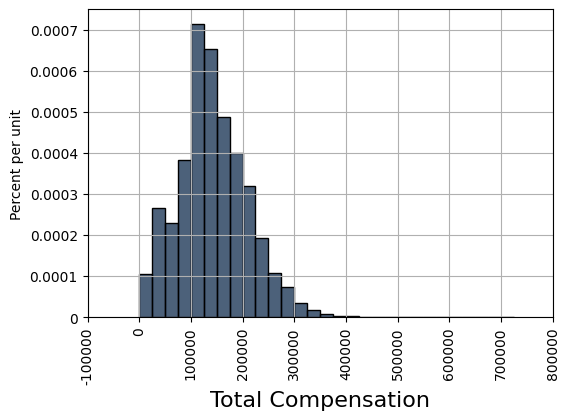

In [10]:
import numpy as np

sf_bins = np.arange(0, 726000, 25000)

sf2019.select('Total Compensation').hist(bins = sf_bins)
plt.grid()

In [11]:
sf2019.sort('Total Compensation', descending=True).show(2)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951


- Suppose the **parameter** in which we are interested is the **median of the total compensations**.
- calculating the parameter (because we have the population data... we usually don't)



In [12]:
### we use percentile

pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

135747.0

- we have this paremeter.
- now, pretend that we don't know the parameter (median) and we want to estimate it.

## 13.2.3. A Random Sample and an Estimate

- draw a sample of 500 employees at random without replacement, and let
- the **median total compensation of the sampled employees serve as our estimate of the parameter**.

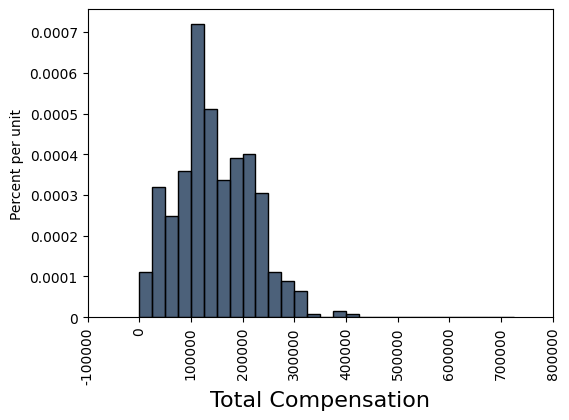

In [13]:
our_sample = sf2019.sample(500, with_replacement=False)   ### "sample" --> table
# our_sample.select('Total Compensation').hist()
our_sample.select('Total Compensation').hist(bins=sf_bins)

In [14]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

137140.0

- we have one estimate of the parameter, but different sample would give us different value.
- we want to **quantify the amount by which the estimate could vary across samples**. That measure of variability will help us measure how accurately we can estimate the parameter.
- get another random sample without sampling again from the population

## 13.2.4. The Bootstrap: Resampling from the Sample

- large random sample (empirical sampling) is likely to resemble the population (theoretical sampling) from which it is drawn
- This observation allows data scientists to lift themselves up by their own bootstraps: the sampling procedure can be replicated by sampling from the sample.
- the bootstrap method for generating another random sample that resembles the population:
  - **Treat the original sample as if it were the population.**
  - **Draw from the sample, at random *with replacement*, the same number of times as the original sample size.** (he variability of an estimate depends on the size of the sample.)

## 13.2.5. Why the Bootstrap Works

### population ==> sample ==> resamples

## 13.2.6. A Resampled Median

- **sample()**:
  -  draws rows from a table **with replacement** by default, and
  -  when it is used without specifying a sample size, by default the sample size equals **the number of rows of the table**.
  -  https://www.data8.org/datascience/_autosummary/datascience.tables.Table.sample.html#datascience.tables.Table.sample
     - Table.sample(k=None, with_replacement=True, weights=None)

In [15]:
resample_1 = our_sample.sample()

In [16]:
# resample_1

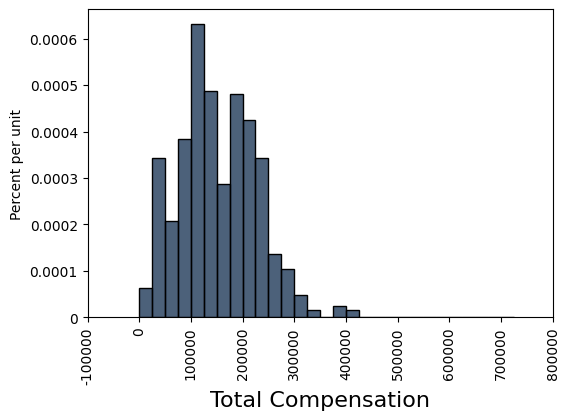

In [17]:
resample_1.select('Total Compensation').hist(bins=sf_bins)   ### select to create a table 

In [18]:
resample_median_1 = percentile(50, resample_1.column('Total Compensation'))
resample_median_1

##### This value is an estimate of the population median.

140970.0

#### By resampling again and again, we can get many such estimates, and hence an empirical distribution of the estimates.



In [19]:
##### (re)sample once
resample_2 = our_sample.sample()   ### our sample
resample_median_2 = percentile(50, resample_2.column('Total Compensation'))
resample_median_2

143392.0

In [20]:
##### function
def one_bootstrap_median():
    resampled_table = our_sample.sample()
    bootstrapped_median = percentile(50, resampled_table.column('Total Compensation'))
    return bootstrapped_median

In [21]:
one_bootstrap_median()

139099.0

## 13.2.7. Bootstrap Empirical Distribution of the Sample Median


In [22]:
repetitions = 5000
bstrap_medians = make_array()

for i in np.arange(repetitions):
    bstrap_medians = np.append(bstrap_medians, one_bootstrap_median())

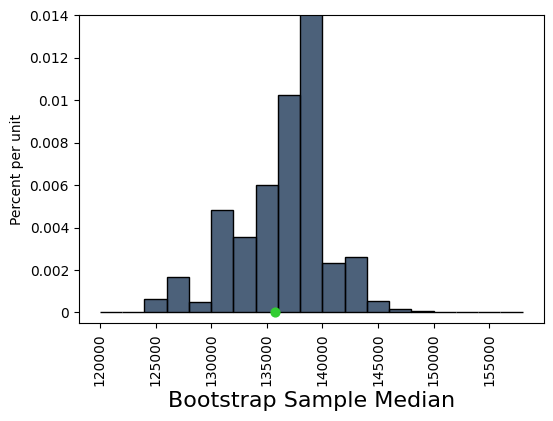

In [23]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_medians)

##### bins values
# resampled_medians.column(0).max()
# resampled_medians.column(0).min()

median_bins = np.arange(120000, 160000, 2000)
resampled_medians.hist(bins=median_bins)

## Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plt.ylim(-0.000005, 0.00014)
plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

### note that this distrubtion reflects that one-time draw of 500 samples

## 13.2.8. Do the Estimates Capture the Parameter?

-How often does the empirical histogram of the resampled medians sit firmly over the green dot, and not just brush the dot with its tails or not cover it at all? 
To answer this, we must define “sit firmly”. 
Let’s take that to mean **“the middle 95% of the resampled medians contains the green dot”**.

In [24]:
##### Here are the two ends of the “middle 95%” interval of resampled medians:

left = percentile(2.5, bstrap_medians)
left

127557.0

In [25]:
right = percentile(97.5, bstrap_medians)
right

143392.0

In [26]:
##### The population median of 135,747 dollars is between these two numbers.

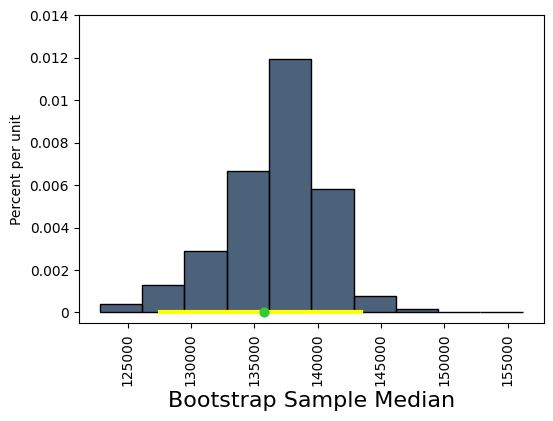

In [27]:
resampled_medians.hist()

### Plotting parameters; you can ignore this code
plt.ylim(-0.000005, 0.00014)
plt.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1)
plt.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [28]:
def bootstrap_median(original_sample, num_repetitions):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_sample.sample()
        new_bstrap_median = percentile(50, new_bstrap_sample.column('Total Compensation'))
        medians = np.append(medians, new_bstrap_median)
    return medians

In [29]:
# THE BIG SIMULATION: This one takes several minutes.

# Generate 100 intervals and put the endpoints in the table intervals

left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [30]:
inervals

NameError: name 'inervals' is not defined

In [ ]:
### we know this (parameter) in this case, but we usually don't know.
pop_median

In [ ]:
### How many of the 100 intervals contain the population median? 
### That’s the number of intervals where the left end is below 
### the population median and the right end is above.

intervals.where(
    'Left', are.below(pop_median)).where(
    'Right', are.above(pop_median)).num_rows